In [1]:
import random
import classes as cls
import routing
import time
from framework import Framework
import cProfile


In [2]:

def test_all_macros_connected(macros, nets):
    for macro in macros:
        connected = any(macro in net.macros for net in nets)
        assert connected, f"Macro {macro.name} is not connected to any net"



# Floorplan Setup

In [3]:
MACRO_CNT = 5
WIDTH_MAX = 150
WIDTH_MIN = 50
HEIGHT_MAX = 150
HEIGHT_MIN = 50

# NET_CNT = 20
RAND_NET_CNT = 1 # Probability of a macro being connected to a net

random.seed(42)  # For reproducibility of random numbers

macros = []
for i in range(MACRO_CNT):
    width = random.randint(WIDTH_MIN, WIDTH_MAX)
    height = random.randint(HEIGHT_MIN, HEIGHT_MAX)
    macro_id = i
    macro_name = f"m{macro_id+1}"
    macro = cls.Macro(macro_name, macro_id, width, height, [])
    pin = cls.Pin(0, 0)
    macro.pins.append(pin)
    macros.append(macro)

# Generate nets connecting the macros
net_set = set()
net_avail = set(macros)
net_cnt = {}
nets = []
LIMIT_NET_CNT = 3
for i in range(len(macros)):
    if (random.random() < RAND_NET_CNT and macros[i] in net_set and macros[i] not in net_avail): continue
    if (len(nets) == 40): break
    macro1 = macros[i]
    while True:
        macro2 = random.choice(list(net_avail))
        if macro2 != macro1:
            break
    net_set.add(macro1)
    net_set.add(macro2)
    net_name = f"n{len(nets)+1}"
    if macro1.id not in net_cnt.keys(): net_cnt[macro1.id] = 1 
    else: net_cnt[macro1.id] += 1
    if macro2.id not in net_cnt.keys(): net_cnt[macro2.id] = 1 
    else: net_cnt[macro2.id] += 1
    if net_cnt[macro1.id] == LIMIT_NET_CNT: net_avail.remove(macro1)
    if net_cnt[macro2.id] == LIMIT_NET_CNT: net_avail.remove(macro2)
    net = cls.Net(net_name, [macro1, macro2])
    nets.append(net)

# Ensure all macros are connected to at least one net
# test_all_macros_connected(macros, nets)
print("Number of macros: ", len(macros))
print("Number of nets: ", len(nets))


Number of macros:  5
Number of nets:  5


# Placement

In [4]:

FL = cls.Floor(1600,1600, 30)
FW = Framework(macros, nets, FL)
start_time=time.time()
print("___________Placement__________")
FW.place(10, genVid=0, filename=f"images/10MACROS_{len(macros)}_{len(nets)}_testhighOL_{FW.floor.h}*{FW.floor.w}.png")
end_time=time.time()
print("Placement Time: ", end_time-start_time)
start_time = time.time()
macros = FW.macros
for macro in macros:
    print(f"{macro.name} : ({macro.x}, {macro.y})")

for net in nets:
    print(f"{net.name} : {[(macro.name, macro.x, macro.y) for macro in net.macros]}")


___________Placement__________
Iteration 0 ----> l:-1734.6207862196238 h:1734.6207862196238  o:0.0
Placement Time:  1.8045892715454102
m1 : (864.1078560941679, 689.8281338384186)
m2 : (778.7380591270645, 639.6130946863989)
m3 : (526.8875888169389, 653.4745136635815)
m4 : (623.978310009207, 667.4147009438035)
m5 : (619.7847128875114, 601.3252330298491)
n1 : [('m1', 864.1078560941679, 689.8281338384186), ('m2', 778.7380591270645, 639.6130946863989)]
n2 : [('m2', 778.7380591270645, 639.6130946863989), ('m5', 619.7847128875114, 601.3252330298491)]
n3 : [('m3', 526.8875888169389, 653.4745136635815), ('m4', 623.978310009207, 667.4147009438035)]
n4 : [('m4', 623.978310009207, 667.4147009438035), ('m2', 778.7380591270645, 639.6130946863989)]
n5 : [('m5', 619.7847128875114, 601.3252330298491), ('m4', 623.978310009207, 667.4147009438035)]


# Routing

_________Routing_________


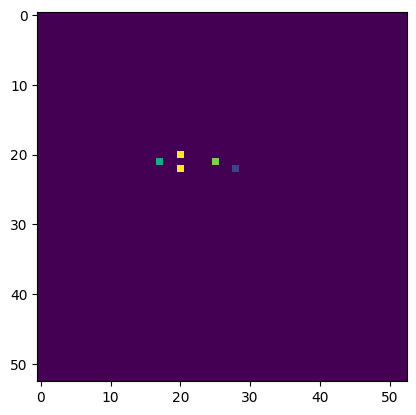

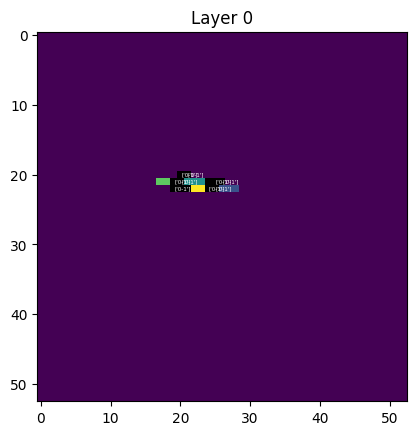

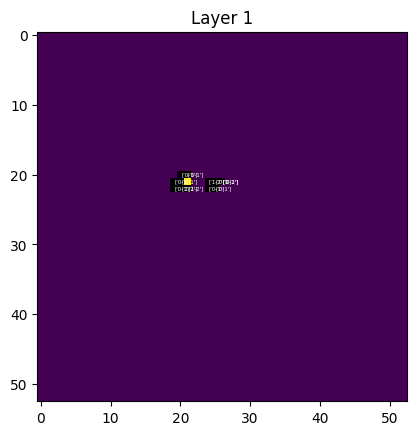

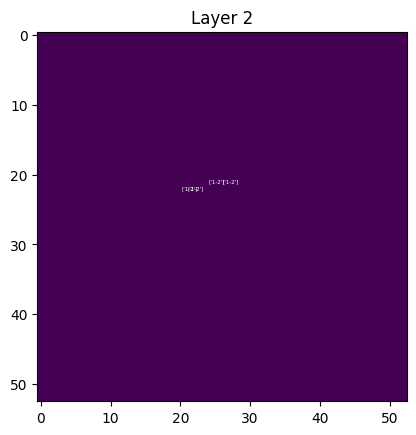

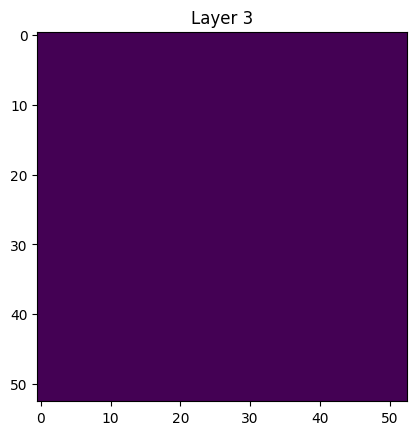

Routing Time:  0.4276089668273926


In [5]:


print("_________Routing_________")
FW.route(disp=True)
end_time = time.time()
print("Routing Time: ", end_time - start_time)

